## Computer Vision作业

In [1]:
import matplotlib.pyplot as plt # plt 用于显示图片
import cv2 as cv # mpimg 用于读取图片
import numpy as np

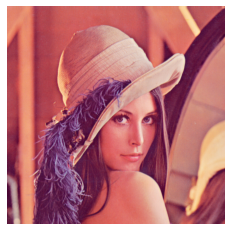

In [2]:
lena = cv.imread('lena.jpg') # 读取和代码处于同一目录下的 lena.png
lena = cv.cvtColor(lena,cv.COLOR_BGR2RGB)
plt.imshow(lena)
plt.axis("off")
plt.show()

In [3]:
def show(pic,gray=0):
    if gray:
        plt.imshow(pic,cmap="gray")
    else:
        plt.imshow(pic)
    plt.axis("off")
    plt.show()

## 1.1 基于opencv使用卷积操作对图像做模糊、锐化操作

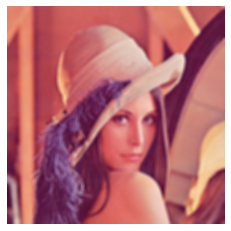

In [4]:
# tips：自定义卷积核，使用cv.filter2D对图像进行卷积操作。调整卷积核从而得到模糊效果
# code:
size = 9
kernel = np.ones((size,size),np.float32)/(size*size)
t = cv.filter2D(lena,-1,kernel)
show(t)

![avatar](lena_2.jpg)

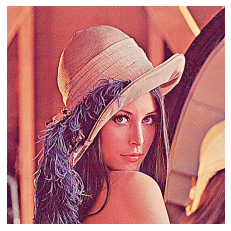

In [5]:
# tips：锐化操作
# code:
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
t = cv.filter2D(lena,-1,kernel)
show(t)

![avatar](lena_1.jpg)

## 1.2 任意选择两种常见噪声对lena图片进行处理

各种不同噪声可以参考https://blog.csdn.net/weixin_40446557/article/details/81451651

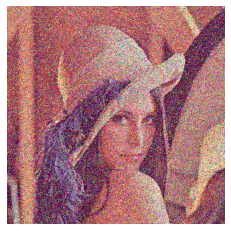

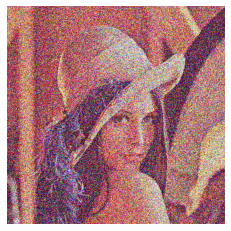

In [6]:
# tips：自定义添加噪声（椒盐噪声或高斯噪声都可）的函数对lena图添加噪声
# code:
from skimage.util import random_noise
t1 = random_noise(lena, mode='s&p',amount=0.3)
t2 = random_noise(lena, mode='gaussian',mean=0,var=0.2)
show((t1*255).astype(np.uint8))
show((t2*255).astype(np.uint8))

![avatar](lena_3.jpg)

## 2 使用角点检测算法对lena的灰度图进行处理并可视化结果
角点检测可以用cv库的函数实现，具体见https://blog.csdn.net/duanyajun987/article/details/82256409?utm_medium=distribute.pc_relevant.none-task-blog-baidujs_title-1&spm=1001.2101.3001.4242

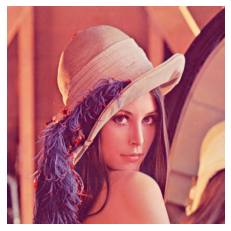

In [7]:
# tips: 角点检测算法可用Shi-Tomasi/Harris 
# 在角点处画圆，半径为4，红色，线宽默认，利于显示
# codes:
gray = cv.cvtColor(lena,cv.COLOR_RGB2GRAY)
dst = cv.cornerHarris(gray,2,3,0.04)
t = lena.copy()
t[dst>0.01*dst.max()]=[255,0,0]
show(t)

![avatar](lena_4.jpg)

## 3 图像分类

针对sklearn自带的人脸数据集的识别任务，利用HOG特征作为图像的特征描述符进行分类

提示：最终提取的特征描述符维度过大，需要考虑用PCA降维后再训练分类器

### 3.1 读取图像数据

In [8]:
import cv2
import numpy as np
import sklearn
from sklearn import datasets

faces = sklearn.datasets.fetch_olivetti_faces(download_if_missing=True)
imgs = faces.images
labels = faces.target

print(imgs.shape)
print(labels.shape)

(400, 64, 64)
(400,)


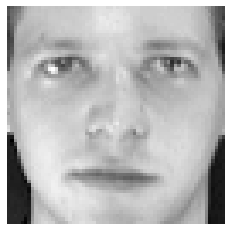

array([[ 79,  93, 106, ...,  94,  84,  77],
       [ 87, 103, 111, ...,  94,  86,  80],
       [ 87, 106, 114, ...,  96,  86,  75],
       ...,
       [ 54,  52,  56, ...,  38,  42,  44],
       [ 51,  53,  53, ...,  37,  41,  42],
       [ 51,  52,  51, ...,  38,  41,  40]], dtype=uint8)

In [9]:
imgs = imgs*255
imgs = np.asarray(imgs, dtype=np.uint8)
show(imgs[0],gray=1)
imgs[0]

### 3.2 提取图像特征描述符

hog特征描述符的说明可以参考：https://blog.csdn.net/zouxy09/article/details/7929348

提示：cv库处理时要求图像格式为np.uint8，请大家注意预处理

In [10]:
# HOG特征
# hog_descriptors 为提取得到的图像hog特征
# code:
hog_descriptors = []
for i in imgs:
    winSize = (64,64) 
    blockSize = (16,16)
    blockStride = (8,8)
    cellSize =(8,8)
    nbins = 9
    derivAperture = 1
    winSigma = 4.
    histogramNormType = 0
    L2HysThreshold = 2.0000000000000001e-01
    gammaCorrection = 0
    nlevels = 64
    hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,
                        histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
    winStride = (0,0)
    padding = (0,0)
    descriptors = hog.compute(i, winStride, padding).reshape((-1,))
    hog_descriptors.append(descriptors)

hog_descriptors = np.array(hog_descriptors)    
print(hog_descriptors)

[[0.272448   0.272448   0.05815419 ... 0.01442885 0.06185728 0.3679608 ]
 [0.07370735 0.27078503 0.28034306 ... 0.10823698 0.0825468  0.03379511]
 [0.28247973 0.09326247 0.02137663 ... 0.02262035 0.02636914 0.19112188]
 ...
 [0.15634029 0.09259315 0.03533808 ... 0.04099218 0.04223029 0.0521746 ]
 [0.26625034 0.11782132 0.03608103 ... 0.0051033  0.01776463 0.0410464 ]
 [0.29805657 0.07420183 0.02576687 ... 0.02308518 0.0567516  0.07265931]]


### 3.3 分类结果

In [11]:
# 需将特征改为需要使用的特征
# 利用SVM或者其他算法进行分类，分类结果展示为下个cell的形式
# 提示：可以使用sklearn库实现分类和结果展示，提供的分类结果只是形式上的展示，请大家参考
# code:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.model_selection import train_test_split
features_descriptors = hog_descriptors
Xtrain, Xtest, ytrain, ytest = train_test_split(features_descriptors,labels)
classifier = LinearSVC()
classifier.fit(Xtrain,ytrain)
predicts = classifier.predict(Xtest)
acc = accuracy_score(ytest,predicts)
rec = recall_score(ytest,predicts, average='macro')
f1 = f1_score(ytest,predicts,average='macro')

In [12]:
print(predicts.reshape((10,10)))
print('*'*35)
print(f"Precision:{acc:.3f}")
print(f"Recall:{rec:.3f}")
print(f"F1 Score:{f1:.3f}")

[[ 8 28 11  4  7 29 31 34 19 21]
 [ 9 31 18 37  8 34 31  6  7 24]
 [31 32 13 35 36 25  1 18 35 10]
 [ 0 30 29 13  9 17 12  0 19  7]
 [ 2 25 12 30  6 32  2 16 10  8]
 [27 18 29 35  8 39  6 11 38 33]
 [24 35  0 34  2 18 22 33  8 24]
 [14 22  6  2 24 15 20 15  1 30]
 [12  9  3 28 26 16 27  1 32 21]
 [38 22 14 23 36 37  3 28 13 38]]
***********************************
Precision:0.990
Recall:0.994
F1 Score:0.988


```py
# 分类结果
[[56  1  0  0  0  0  0  0  0  0]
 [ 0 48  1  0  0  0  0  0  0  0]
 [ 0  0 49  0  1  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  1  0 40  0  1  0  0  0]
 [ 0  0  0  0  0 49  0  0  0  0]
 [ 0  0  0  0  0  0 46  0  0  0]
 [ 0  0  1  0  1  0  0 58  0  2]
 [ 0  0  0  2  0  1  1  0 52  1]
 [ 0  1  0  2  1  0  0  3  0 44]]
***********************************
Precision:   0.958
Recall:      0.958
F1 score:    0.958
```

## 4 附加题目
完成上面的1-3题即可得到全部基础分，第4部分为附加题，内容会有部分超纲，完成会有额外加分

### 4.1 设计合理的噪声或变换，使得在人眼观感差别不大的情况下（至少可以轻松识别分类）对hog特征的分类算法产生较明显的负面影响。（+1分）

In [13]:
## code:

### 4.2 在要求1的基础上，设计合理的补充特征，避免要求1加入的噪声带来的负面影响并说明设计思路。（+1分）

In [14]:
## code: